In [80]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [43]:
df = pd.read_excel("var4.xlsx", engine='openpyxl')
df.head()

,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет,Магазин біля дому
0,9.0,1,1,старий,3.0,659.0,76.85,108.0,14910.0,1,1,0,1,1
1,22.0,1,1,старий,4.1,1518.0,84.86,750.0,9030.0,0,0,0,1,1
2,13.0,1,1,старий,3.0,476.0,112.02,0.0,9030.0,0,0,0,0,0
3,18.0,1,1,старий,3.0,1310.0,119.80,0.0,13930.0,1,0,0,1,1
4,25.0,1,1,новий,4.0,2029.0,94.88,0.0,14560.0,0,0,0,0,0


In [23]:
df.shape

(69, 14)

In [24]:
df.dtypes

Торговельна площа, кв. м.    float64
Этаж                           int64
Количество касс                int64
Тип                           object
Рейтинг в гуглі              float64
Количество чеков             float64
Средний чек                  float64
Населення                    float64
Середній дохід населення     float64
Спеціалізоване м'ясо           int64
Спеціалізований сир            int64
Спеціалізована поб. Хімія      int64
Супермаркет                    int64
Магазин біля дому              int64
dtype: object

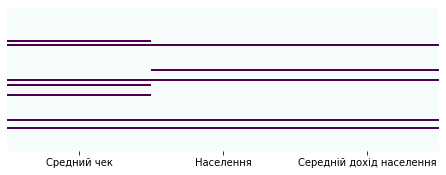

In [25]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > df.shape[0]*0.01].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),cbar=False, yticklabels=False, cmap='BuPu', ax=ax)
plt.show()

In [26]:
pd.DataFrame(df.isnull().sum())

,0
"Торговельна площа, кв. м.",0
Этаж,0
Количество касс,0
Тип,0
Рейтинг в гуглі,0
Количество чеков,0
Средний чек,7
Населення,5
Середній дохід населення,5
Спеціалізоване м'ясо,0


In [44]:
#missing data is numeric, so let's recover it accordingly
dfm = df
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Средний чек']] = imputer_mean.fit_transform(dfm[['Средний чек']]).round()
dfm[['Населення']] = imputer_mean.fit_transform(dfm[['Населення']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()


In [30]:
dfm.describe()

,"Торговельна площа, кв. м.",Этаж,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет,Магазин біля дому
count,69.000000,69.0,69.000000,69.000000,69.000000,62.000000,64.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,34.872145,1.0,1.231884,3.810145,4084.097008,95.897581,295.953125,11418.593750,0.289855,0.231884,0.246377,0.202899,0.304348
std,21.704293,0.0,0.458416,0.695605,2213.334346,19.192685,322.552785,2528.015011,0.457019,0.425127,0.434057,0.405104,0.463502
min,4.000000,1.0,1.000000,1.800000,476.000000,65.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.0,1.000000,3.000000,2344.000000,82.420000,0.000000,10412.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.500000,1.0,1.000000,4.000000,3995.469796,93.855000,179.500000,11515.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1.0,1.000000,4.300000,4826.000000,102.787500,564.000000,12915.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,119.300000,1.0,3.000000,5.000000,9687.000000,168.070000,963.000000,15470.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
dfm.corr()

,"Торговельна площа, кв. м.",Этаж,Количество касс,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет,Магазин біля дому
"Торговельна площа, кв. м.",1.000000,NaN,0.240172,0.158263,0.369809,0.250919,-0.077266,-0.288237,-0.278829,-0.176948,-0.065134,-0.045544,0.222146
Этаж,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Количество касс,0.240172,NaN,1.000000,0.227715,0.672653,0.458314,0.261683,-0.142751,0.165820,-0.129046,0.152098,-0.098699,0.009028
Рейтинг в гуглі,0.158263,NaN,0.227715,1.000000,0.338443,0.279270,0.191706,-0.206958,-0.092652,0.016793,-0.037624,-0.158754,-0.105502
Количество чеков,0.369809,NaN,0.672653,0.338443,1.000000,0.474175,0.208706,-0.191436,-0.022929,-0.002051,0.125728,-0.130347,0.005291
Средний чек,0.250919,NaN,0.458314,0.279270,0.474175,1.000000,0.103396,-0.246257,0.085172,0.034719,0.108564,-0.088421,0.053590
Населення,-0.077266,NaN,0.261683,0.191706,0.208706,0.103396,1.000000,-0.132534,0.062879,-0.157435,0.158280,-0.072794,0.159305
Середній дохід населення,-0.288237,NaN,-0.142751,-0.206958,-0.191436,-0.246257,-0.132534,1.000000,0.056960,-0.064416,-0.071174,0.135317,0.033826
Спеціалізоване м'ясо,-0.278829,NaN,0.165820,-0.092652,-0.022929,0.085172,0.062879,0.056960,1.000000,0.481563,0.227770,0.154258,-0.075460
Спеціалізований сир,-0.176948,NaN,-0.129046,0.016793,-0.002051,0.034719,-0.157435,-0.064416,0.481563,1.000000,0.243702,-0.106428,-0.064897


In [28]:
dfm.Этаж.value_counts() # Очевидно почему мы не наблюдем корреляцию, значение не изменно

1    69
Name: Этаж, dtype: int64

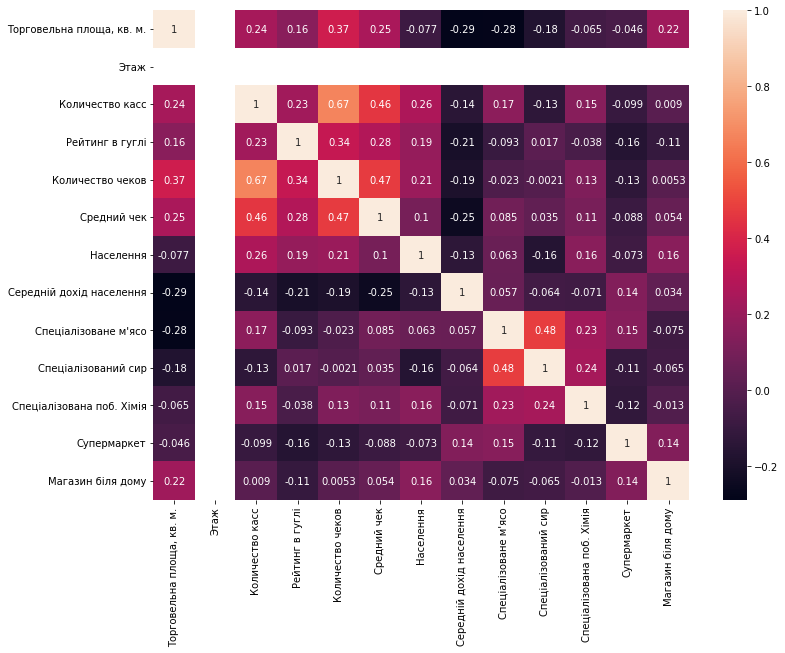

In [29]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Найбольшая корреляция между количеством человек и количеством касс, так же на эти данные незначительно влияет средний чек.

In [45]:

#encoding
dfs = dfm[['Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Тип,3,"[старий, новий, cтарий]",object


In [47]:
type_ = {'старий':0,'cтарий':0,'новий':1}
dfm['Тип'] = dfm['Тип'].map(type_)
dfm

,"Торговельна площа, кв. м.",Этаж,Количество касс,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Населення,Середній дохід населення,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет,Магазин біля дому
0,9.00,1,1,0,3.0,659.0,77.0,108.0,14910.0,1,1,0,1,1
1,22.00,1,1,0,4.1,1518.0,85.0,750.0,9030.0,0,0,0,1,1
2,13.00,1,1,0,3.0,476.0,112.0,0.0,9030.0,0,0,0,0,0
3,18.00,1,1,0,3.0,1310.0,120.0,0.0,13930.0,1,0,0,1,1
4,25.00,1,1,1,4.0,2029.0,95.0,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,40.78,1,2,1,4.0,6884.0,107.0,963.0,9800.0,0,0,1,0,0
65,21.50,1,1,1,2.3,4721.0,89.0,0.0,12600.0,1,1,1,0,0
66,115.23,1,1,0,3.0,3286.0,106.0,315.0,10570.0,0,0,0,0,1
67,34.80,1,2,1,4.3,3963.0,168.0,0.0,12460.0,1,1,0,0,0


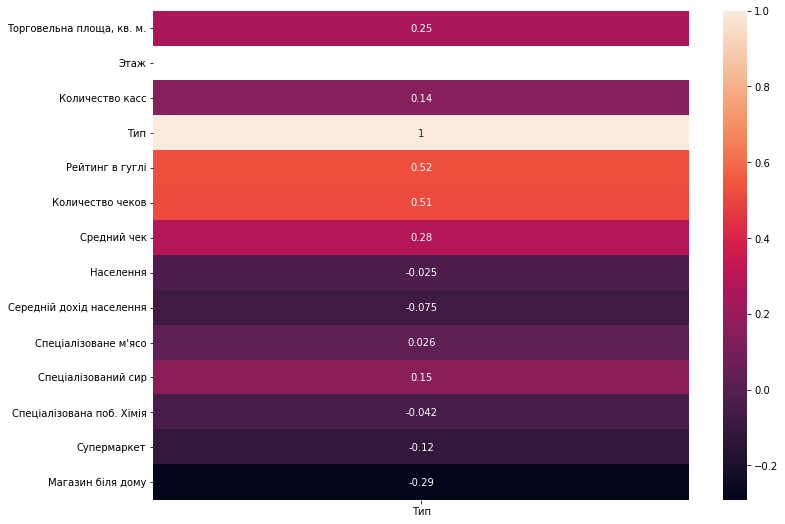

In [50]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[['Тип',]], annot=True)
plt.show()

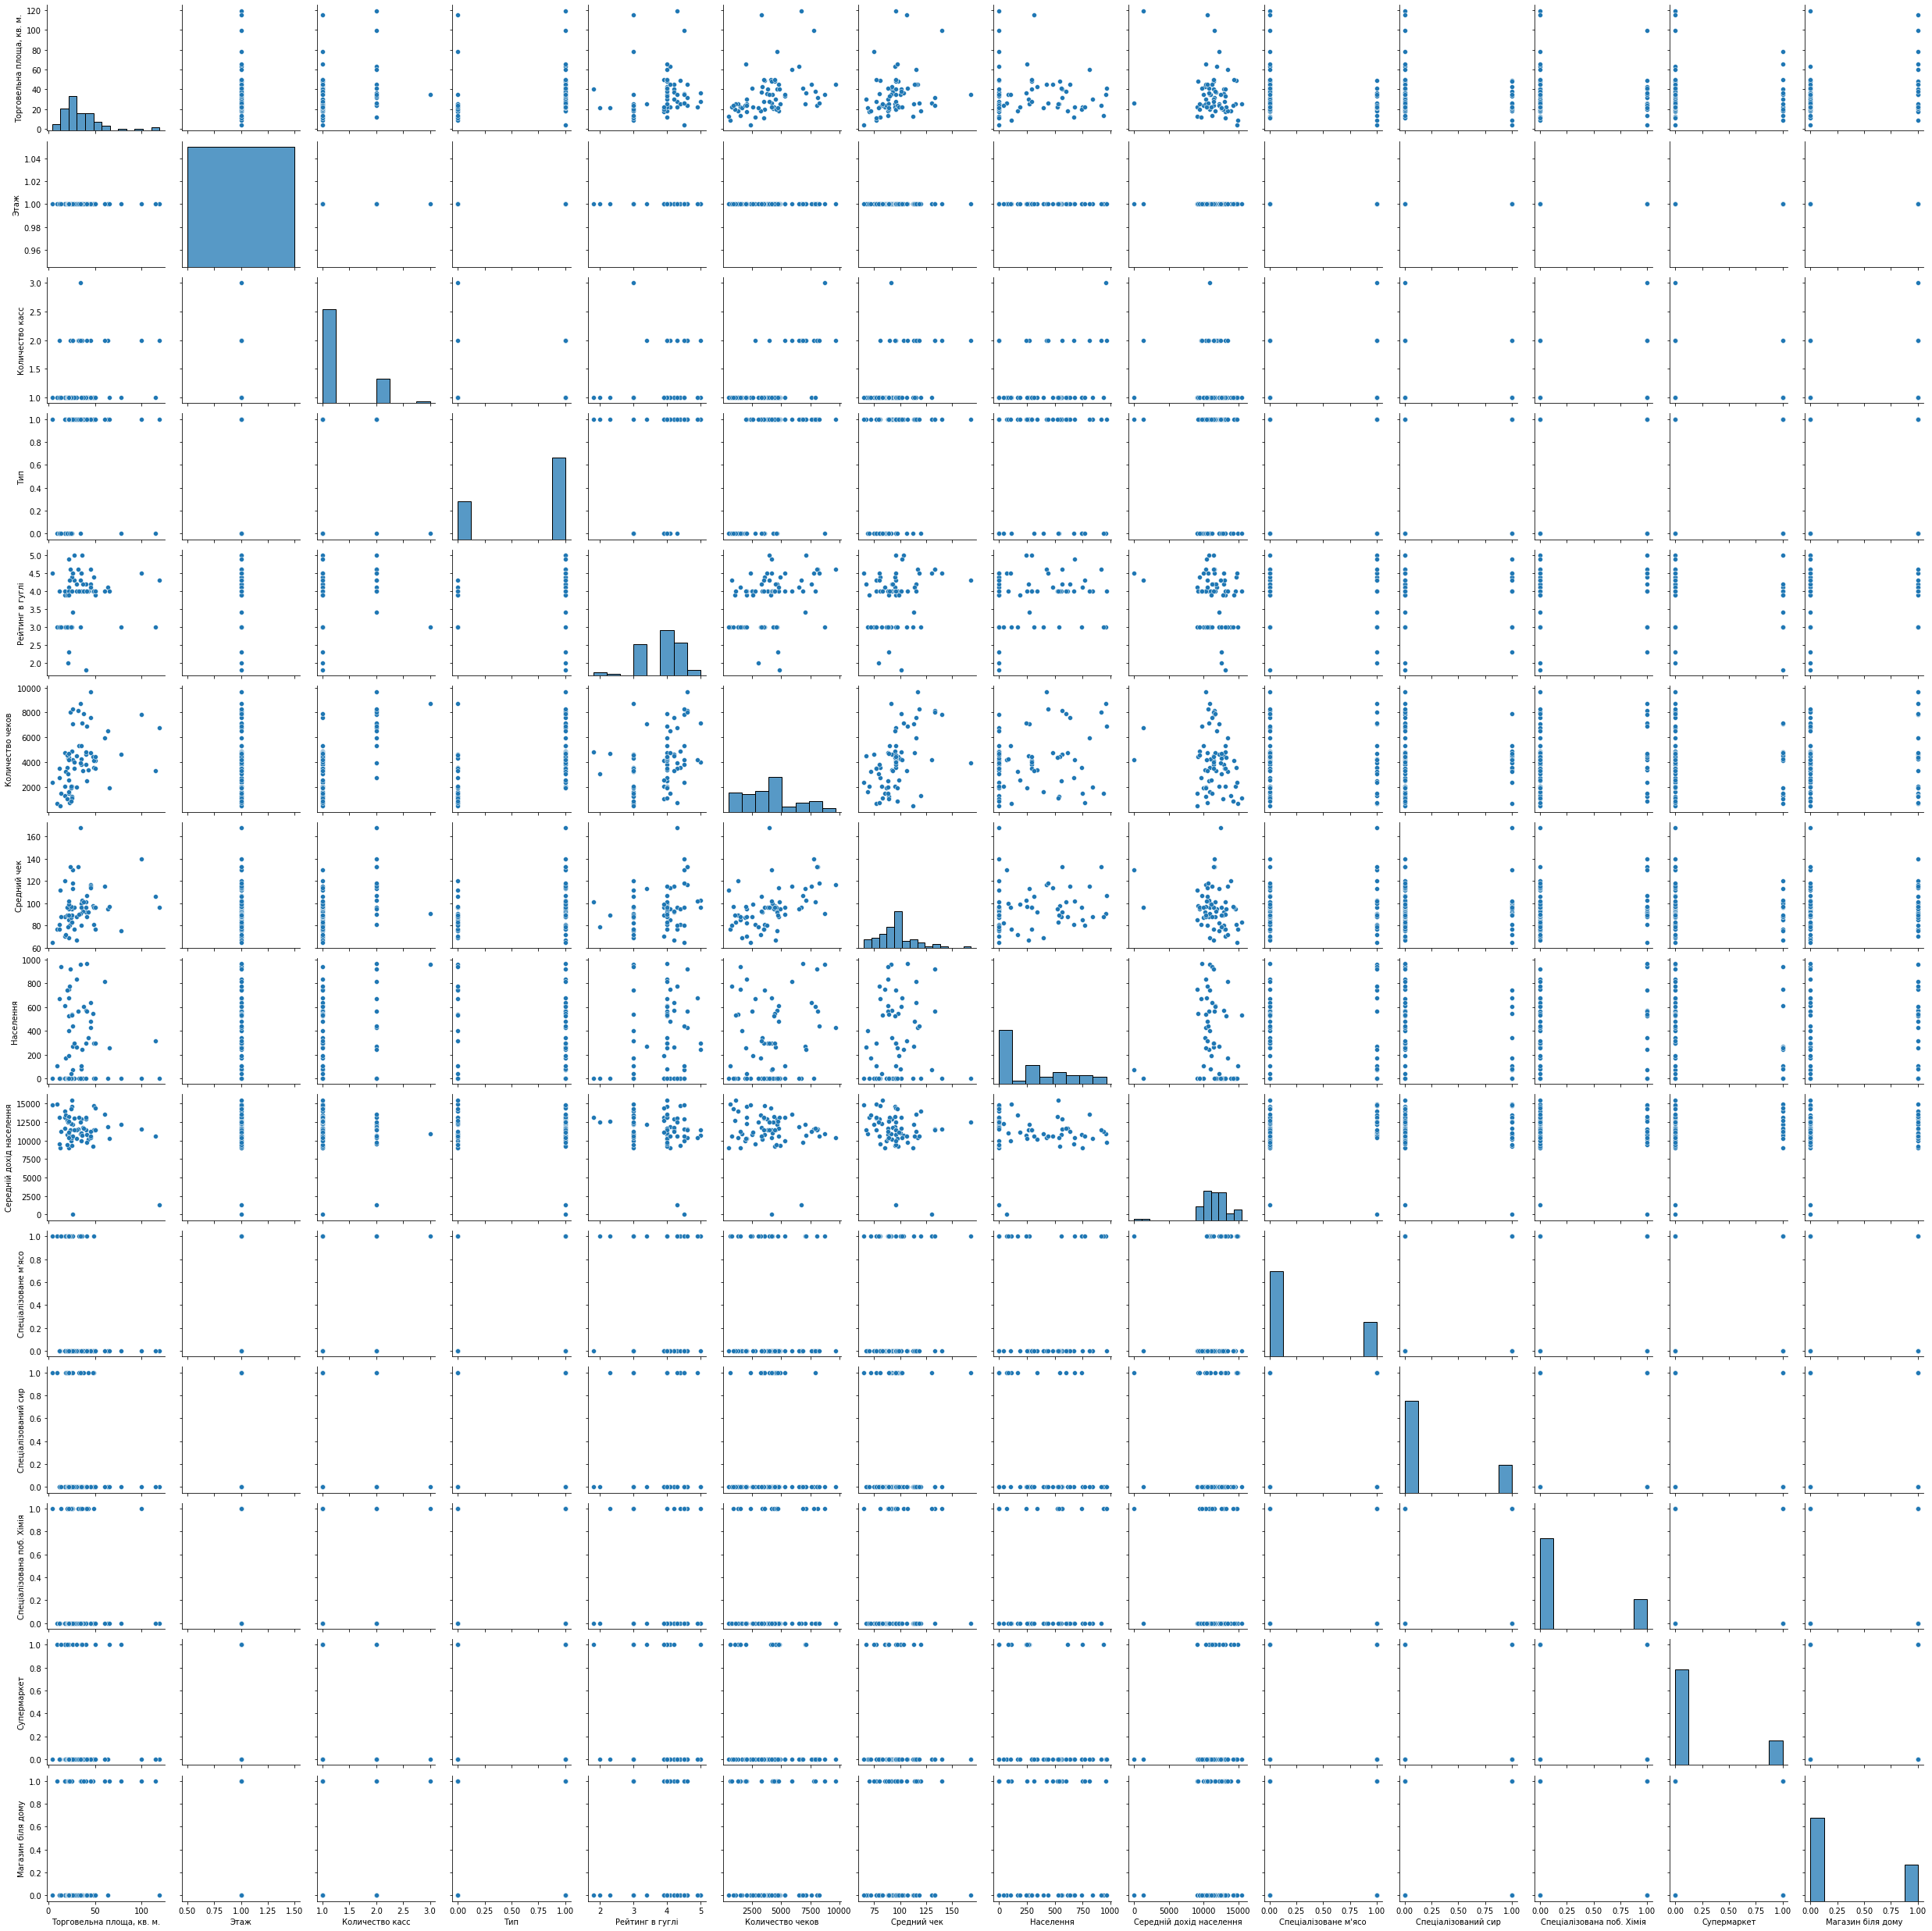

In [51]:
sns.pairplot(dfm)

Modeling

In [53]:
#linear regression
#Splitting the dataset into the Training set and Test set
feature_name = ['Количество касс','Количество чеков','Тип','Середній дохід населення','Рейтинг в гуглі']
X =dfm[feature_name]
y = dfm['Средний чек']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [63]:

# Fitting Simple Linear Regression to the Training set
f1 = ['Количество чеков']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([0.0043822]), 78.51994001567438)

In [64]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.294, -0.147)

In [65]:
print(mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

15.19


18.54

In [72]:
# Fitting Linear Regression based on 5 features to the Training set

from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

(array([ 1.04700887e+01,  1.66584464e-03,  7.75029804e+00, -5.01048935e-04,
         4.05979543e+00]),
 61.52211469043189)

In [73]:
# Predicting the Test set results
y_pred2 = mr.predict(X_test)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.395, -0.366)

In [74]:
print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred2, squared=False).round(2)

14.06


20.23

Если сравнивать с прошлой линейной регресией, мы видим что в многофакторной регресии возникла проблема переобучнения.

In [77]:
# Checking p-values
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.pvalues

const                       0.000691
Количество касс             0.095543
Количество чеков            0.263717
Тип                         0.193270
Середній дохід населення    0.544318
Рейтинг в гуглі             0.224213
dtype: float64

In [78]:
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Средний чек   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     6.403
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           0.000119
Time:                        21:15:17   Log-Likelihood:                -223.43
No. Observations:                  55   AIC:                             458.9
Df Residuals:                      49   BIC:                             470.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       61.5221     16.982      3.623      0.001      27.396      95.648
Количество касс             10.4701      6.160      1.700      0.096      -1.909      22.850
Количество чеков             0.0017      0.001      1.131      0.264      -0.001       0.005
Тип                          7.7503      5.875      1.319      0.193      -4.057      19.558
Середній дохід населення    -0.0005      0.001     -0.611      0.544      -0.002       0.001
Рейтинг в гуглі              4.0598      3.298      1.231      0.224      -2.568      10.688
==============================================================================
Omnibus:                       25.010   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.715
Skew:                           1.309   Prob(JB):                     7.97e-13
Kurtosis:                       7.178   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# Fitting Polynomial Regression to the dataset
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 1.04700887e+01,  1.66584464e-03,  7.75029804e+00, -5.01048935e-04,
         4.05979543e+00]),
 61.52211469043189)

In [82]:
# Predicting the Test set results
y_pred = pr.predict(X_test)

# Coefficient of determination R^2
pr.score(X_train, y_train).round(3), pr.score(X_test, y_test).round(3)

(0.395, -0.366)

In [83]:
# Mean squared error
print(mean_squared_error(y_train, pr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

14.06


20.23

In [87]:
# Fitting Random Forest to the Training set
rf = RandomForestRegressor(n_estimators = 2, max_leaf_nodes = 25, random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)

# Metrics
metrics(X_train, X_test, y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,9.21,0.74
Test,19.36,-0.25


In [90]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature_, round(importance, 2)) for feature_, importance in zip(feature_name, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Количество чеков     Importance: 0.47
Variable: Количество касс      Importance: 0.19
Variable: Середній дохід населення Importance: 0.18
Variable: Рейтинг в гуглі      Importance: 0.14
Variable: Тип                  Importance: 0.01


Выводы:
Мы видим что все модели имеют плохие показатели R2. Так же мы столкнулись с проблемой переобучения в многофакторной модели. Одной из причин возникновения плохих результатов может быть корреляция между переменными. 

Смотря на данные можем сказать что их количества не достаточно для создания качественной модели. Всего 69 примеров, очень мало. Количество отсутствующих значений(NaN) небольшое это хорошо, замена их на среднее почти не изменило данные.

Исходя из R2 лучшей моделью будет Random Forest. Но я бы советовал исправить проблему переобучения многофакторной модели и использовать ее. 